---
title: Lab 2 Acacado Prices
author: Marvin (Wenxiang) Li
format:
    html:
        toc: False
        code-fold: true
embed-resources: true
---

### 0. Import the data and declare your package dependencies.

In [2]:
import pandas as pd
import plotnine as p9
import numpy as np
from mizani.formatters import percent_format # for the  last question

In [3]:
df_had = pd.read_csv('/Users/marvinlee/Documents/vs_code/gsb_544/lab/lab_2/avocado-updated-2020.csv')

In [4]:
%%capture
df_had .info()

### 1. Briefly describe the data set. What information does it contain?
- Totol entries = 33045. Every column has 33045 non-null values. No null value is discoverd.
- Rename PLU into sizes of avacados. 
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### 2. Clean the data in any way you see fit.

- rename PLU to size

In [5]:
df_had = df_had.rename(columns={'4046': 'small', '4225': 'large', '4770': 'xlarge'})

- Explore the geography column

In [6]:
%%capture
df_had['geography'].unique()

- extract all metro area data excluding any multi-state columns

In [7]:
df_had_clean = df_had[(df_had['geography'] != "Total U.S.") &
                   (df_had['geography'] != "California") &
                   (df_had['geography'] !=  "Midsouth") &
                   (df_had['geography'] !=  "Great Lakes") &
                   (df_had['geography'] !=  "Plains") &
                   (df_had['geography'] !=  "South Central") &
                   (df_had['geography'] !=  "Southeast") &
                   (df_had['geography'] !=  "West") &
                   (df_had['geography'] !=  "Northeast")
                   ]


- extract yy-mm-dd to new columns

In [8]:
df_had_clean['date'] = pd.to_datetime(df_had_clean['date'])
df_had_clean['year'] = df_had_clean['date'].dt.year.astype(str)
df_had_clean['month'] = df_had_clean['date'].dt.month.astype(str)
df_had_clean['day'] = df_had_clean['date'].dt.day.astype(str)

/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_26211/1222216599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_26211/1222216599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_26211/1222216599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [9]:
df_had_clean['major_region'] = None

# Assign major regions using boolean masking suggested by Chat; this is better than the (df[]) & (df[]) or (df[]) | (df()) approach
df_had_clean.loc[df_had_clean['geography'].isin(['Albany', 'Boston', 'Buffalo/Rochester', 'New York', 'Hartford/Springfield', 'Philadelphia', 'Syracuse']), 'major_region'] = 'Northeast'
df_had_clean.loc[df_had_clean['geography'].isin(['Chicago', 'Cincinnati/Dayton', 'Columbus', 'Detroit', 'Indianapolis', 'Grand Rapids', 'St. Louis']), 'major_region'] = 'Midwest'
df_had_clean.loc[df_had_clean['geography'].isin(['Atlanta', 'Baltimore/Washington', 'Charlotte', 'Dallas/Ft. Worth', 'Houston', 'Jacksonville', 'Miami/Ft. Lauderdale', 'Nashville', 'New Orleans/Mobile', 'Orlando', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Tampa']), 'major_region'] = 'South'
df_had_clean.loc[df_had_clean['geography'].isin(['Boise', 'Denver', 'Las Vegas', 'Los Angeles', 'Phoenix/Tucson', 'Portland', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 'Spokane']), 'major_region'] = 'West'
df_had_clean.loc[df_had_clean['geography'].isin(['Harrisburg/Scranton', 'Pittsburgh']), 'major_region'] = 'Great Lakes'
df_had_clean.loc[df_had_clean['geography'] == 'West Tex/New Mexico', 'major_region'] = 'Plain'

/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_26211/2803710113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
df_had_clean.head(5)

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day,major_region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,4,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1,4,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,4,South
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,1,4,South
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,1,4,South


### 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [11]:
# filter out rows with organic; group by 'geography'; take the sum of each group and sort from large to small
df_question3 = df_had_clean[(df_had_clean['type'] == "organic") & (df_had_clean['year'] == "2017")].groupby('major_region').agg({'small': 'sum'}).reset_index()
df_question3 = df_question3.sort_values(by = ["small"], ascending=False)
print(df_question3.head())

  major_region       small
5         West  2318653.51
4        South  1198065.26
2    Northeast   779491.72
1      Midwest   143113.83
3        Plain   110910.95


- The West region sold the most total organic, small Hass avocados in 2017 with 600718.66 avacados

### 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [12]:
df_question4 = df_had_clean.groupby('month').agg({'total_volume':'mean'})
df_question4 = df_question4.sort_values(by = ["total_volume"], ascending=False) # must reassign to keep sorted result
print(df_question4)


        total_volume
month               
5      329157.166198
2      320319.598579
6      307525.158808
4      296715.682188
3      290129.055634
1      288404.703679
7      286723.500132
8      278325.173936
9      266688.612132
10     249364.581979
11     242971.370124
12     237493.910176


- May has the highest average total volume sold with 329157.166198 avacados

### 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable

In [13]:
df_question5 = df_had_clean.groupby('geography').agg({'total_volume':'mean'}).reset_index() # highest averages of total_volume
df_question5 = df_question5.sort_values(by = ["total_volume"], ascending=False).round(2) # sort and find the top 5
print(df_question5.head(5))

           geography  total_volume
20       Los Angeles    1567566.16
25          New York     863145.82
10  Dallas/Ft. Worth     712751.90
16           Houston     687653.34
29    Phoenix/Tucson     625038.26


- You still want each individual observations in your plot, but you will need to somehow identify the average for each metro geographical region. That means finding the top 5 mean but use only the name. 
- the plot will still be using the original data

/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


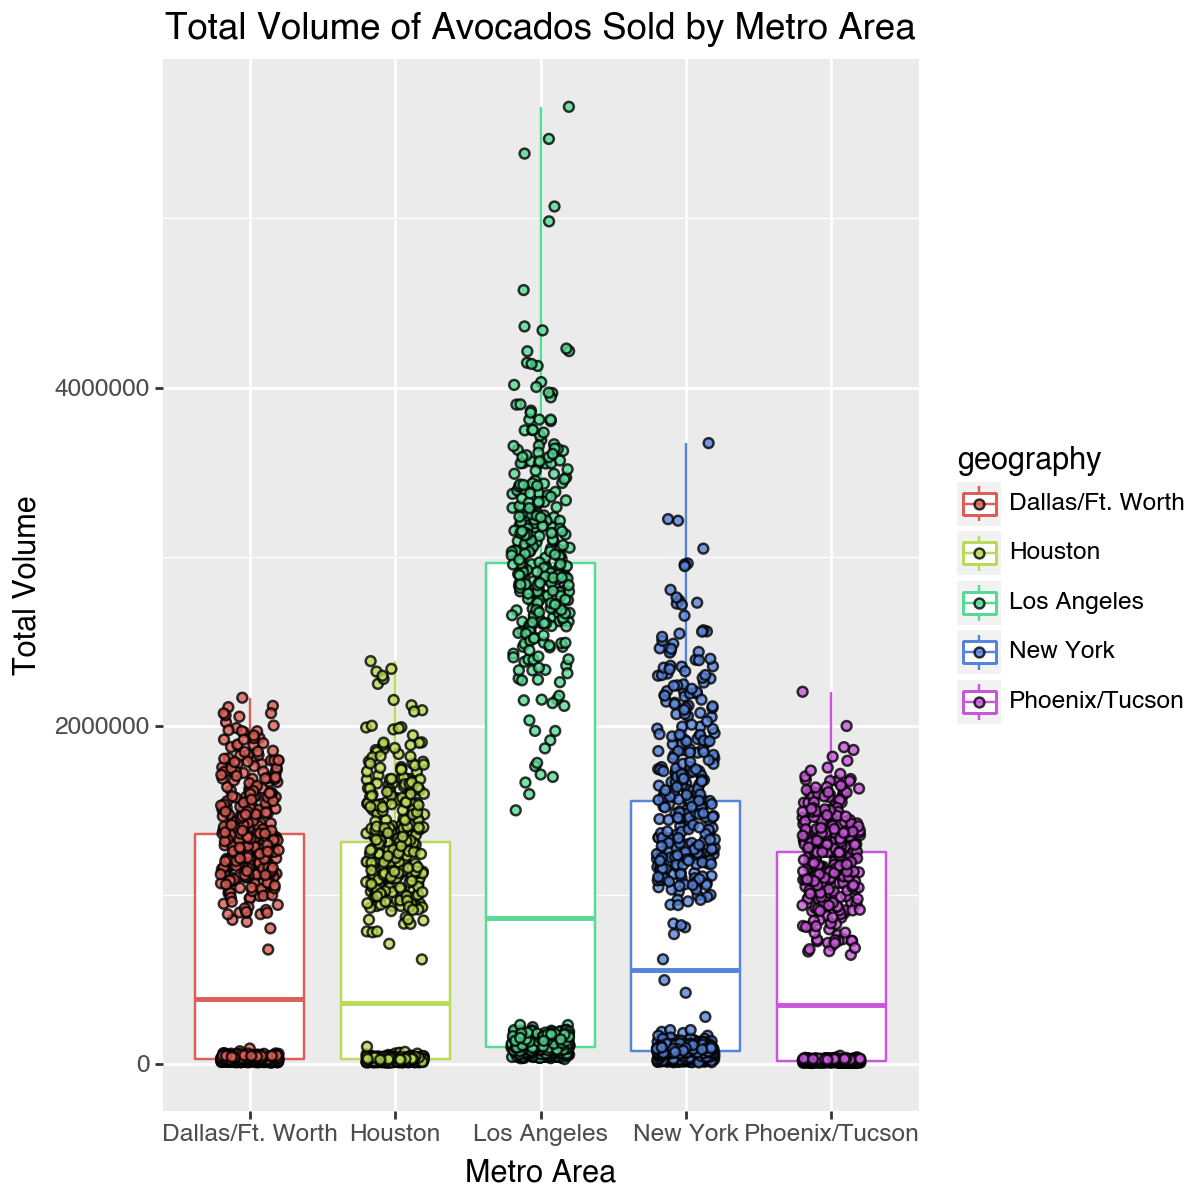

[<Figure Size: (600 x 600)>]

In [14]:
df_top_5 = ['Los Angeles', 'New York', 'Dallas/Ft. Worth', 'Houston', 'Phoenix/Tucson'] # create a list for .isin()
df_top5_volume = df_had_clean[df_had_clean['geography'].isin(df_top_5)]
[p9.ggplot(df_top5_volume)+ 
 p9.aes(x = "geography", y = "total_volume") +
 p9.geom_boxplot(p9.aes(color = "geography")) +
 p9.geom_jitter(p9.aes(fill = "geography"),width=0.2, height=0.2, alpha = 0.8) +
 p9.theme(figure_size=(6, 6)) +
 p9.ggtitle('Total Volume of Avocados Sold by Metro Area') +
        p9.xlab('Metro Area') +
        p9.ylab('Total Volume')
]


### 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [15]:
ca_region = ['Sacramento', "Los Angeles", "San Diego", "San Francisco"]
df_queston6 = df_had_clean[df_had_clean['geography'].isin(ca_region)]
df_queston6.head(2)

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day,major_region
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,1,4,West
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,1,4,West


### 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization

- extract conventional price

In [16]:
df_queston6_con = df_queston6[df_queston6['type']== 'conventional']
df_queston6_con = df_queston6_con.rename(columns={'average_price': 'average_price_con'})
df_queston6_con = df_queston6_con[["year", "month", "day","average_price_con","geography"]].reset_index()
df_queston6_con.head(4)


,index,year,month,day,average_price_con,geography
0,44,2015,1,4,0.85,Los Angeles
1,80,2015,1,4,1.05,Sacramento
2,82,2015,1,4,0.94,San Diego
3,84,2015,1,4,0.99,San Francisco


- extract organic price 

In [17]:
df_queston6_org = df_queston6[df_queston6['type']== 'organic'] #extract organic
df_queston6_org = df_queston6_org.rename(columns={'average_price': 'average_price_org'}) # rename price org
df_queston6_org = df_queston6_org[["year", "month", "day","average_price_org","geography"]] # take neccessary cols
df_queston6_org.head(4)

,year,month,day,average_price_org,geography
45,2015,1,4,1.25,Los Angeles
81,2015,1,4,1.33,Sacramento
83,2015,1,4,1.23,San Diego
85,2015,1,4,1.18,San Francisco


- join the two table

In [18]:
df_queston6_neo = df_queston6_con.merge(df_queston6_org, on=["year", "month", "day", "geography"])
df_queston6_neo.head(4)

,index,year,month,day,average_price_con,geography,average_price_org
0,44,2015,1,4,0.85,Los Angeles,1.25
1,80,2015,1,4,1.05,Sacramento,1.33
2,82,2015,1,4,0.94,San Diego,1.23
3,84,2015,1,4,0.99,San Francisco,1.18


- compute mean

In [19]:
df_queston6_diff = df_queston6_neo.groupby("geography").agg(
   mean_average_price_con=('average_price_con', 'mean'), mean_average_price_org=('average_price_org', 'mean')
) # 
df_queston6_diff['diff'] = df_queston6_diff['mean_average_price_con'] - df_queston6_diff['mean_average_price_org']
df_queston6_diff = df_queston6_diff.sort_values('diff', ascending = True)
df_queston6_diff

,mean_average_price_con,mean_average_price_org,diff
geography,,,
San Francisco,1.400490,2.119444,-0.718954
San Diego,1.113856,1.798366,-0.684510
Sacramento,1.295359,1.873856,-0.578497
Los Angeles,1.047124,1.574902,-0.527778


/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


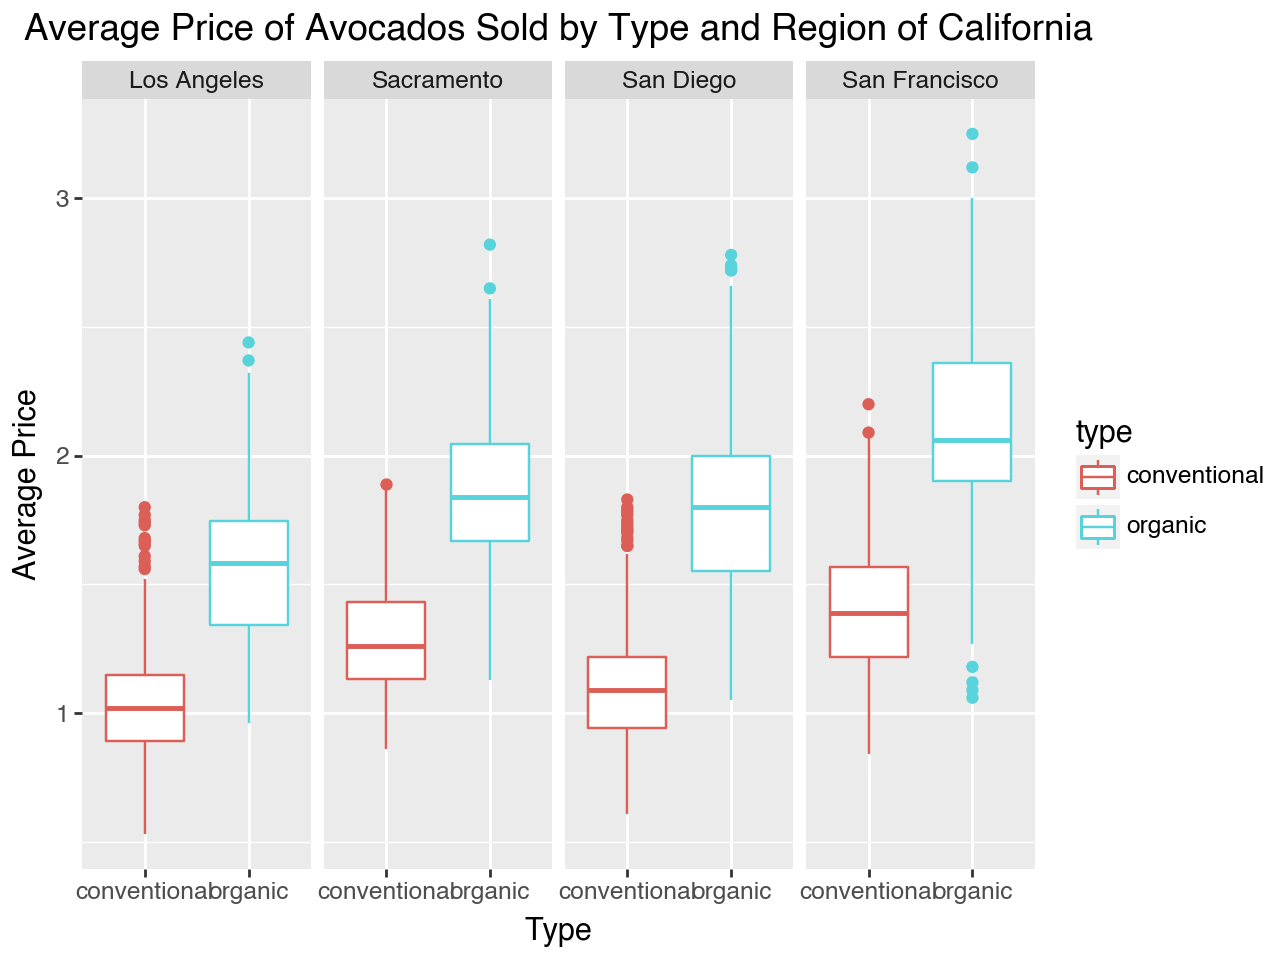

[<Figure Size: (640 x 480)>]

In [20]:
[p9.ggplot(df_queston6)+ 
 p9.aes(x = "type", y = "average_price") +
 p9.geom_boxplot(p9.aes(color = "type",)) +
 p9.facet_wrap('geography', ncol = 4)+
 p9.ggtitle('Average Price of Avocados Sold by Type and Region of California') +
        p9.xlab('Type') +
        p9.ylab('Average Price')
]

- San Francisco has the highest difference among all CA regions

### 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [21]:
df_question8 = df_queston6.melt(
    id_vars=['geography','type'],
    value_vars=['small', 'large', 'xlarge'],var_name='size', value_name='sales_volume')
df_question8.head(5)


,geography,type,size,sales_volume
0,Los Angeles,conventional,small,1837999.65
1,Los Angeles,organic,small,47721.51
2,Sacramento,conventional,small,110693.69
3,Sacramento,organic,small,3727.52
4,San Diego,conventional,small,244152.26


/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'fill' is already present.
Adding another scale for 'fill',
which will replace the existing scale.



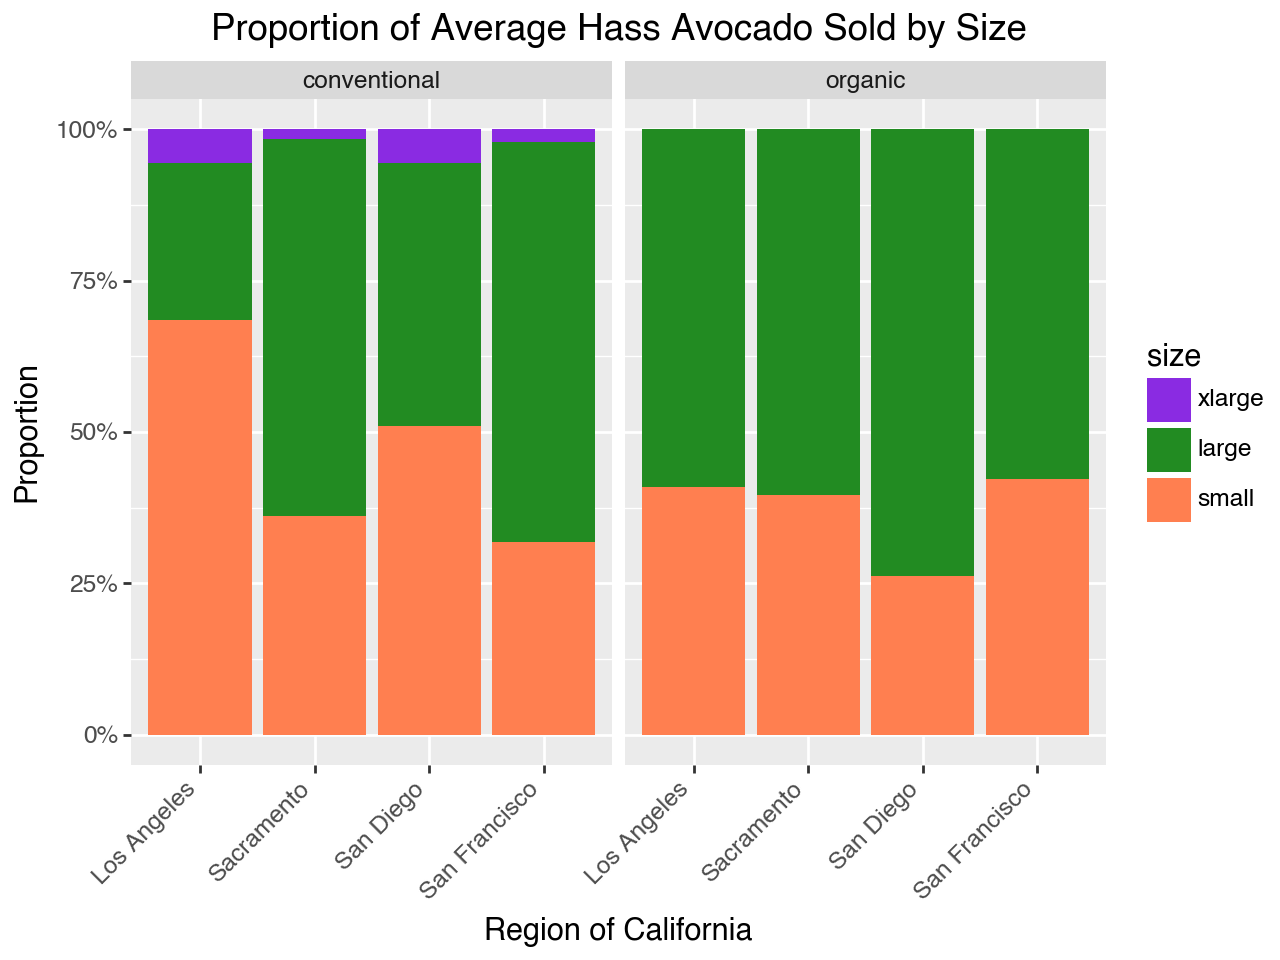

In [22]:
df_question8['size'] = pd.Categorical(df_question8['size'], categories=["xlarge", "large", "small"], ordered=True) # forced ordering suggested by Chat
# assign color
color_mapping = {
    'xlarge': 'blueviolet',   # Color for xlarge
    'small': 'coral',  # Color for small
    'large': 'forestgreen'    # Color for large
}
# plot
(p9.ggplot(df_question8)+
 p9.aes(x = "geography", y = "sales_volume", fill = "size") + 
 p9.geom_bar(stat='identity',position = "fill") +
 p9.facet_wrap('type', ncol = 2) + 
 p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1)) +
 p9.scale_fill_discrete(limits=["xlarge", "small", "large"]) +
 p9.scale_fill_manual(values = color_mapping) +
 p9.scale_y_continuous(labels=percent_format()) + # add mizani package suggested by stack overflow
 p9.ggtitle('Proportion of Average Hass Avocado Sold by Size') +
        p9.xlab('Region of California') +
        p9.ylab('Proportion')
)

### 9. Using Outside Data
- All-Transactions House Price Index for Sac, SF, SD, and LA. 
Data was pulled from https://fred.stlouisfed.org/series/CASTHPI#0
- Data has been adjusted to show the four metropolian regions
- The ATHPI is a weighted, repeat-sales index.
 This means that it measures average price changes in repeat sales or refinancings on the same properties. The index is weighted to reflect the relative importance of different types of properties in the housing market.

In [23]:
df_housing = pd.read_csv('/Users/marvinlee/Documents/vs_code/gsb_544/lab/lab_2/fredgraph.csv')
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            6 non-null      object 
 1   ATNHPIUS40900Q  6 non-null      float64
 2   ATNHPIUS41884Q  6 non-null      float64
 3   ATNHPIUS41740Q  6 non-null      float64
 4   ATNHPIUS31084Q  6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 372.0+ bytes


Extract year

In [24]:
df_housing['DATE'] = pd.to_datetime(df_housing['DATE'])
df_housing['year'] = df_housing['DATE'].dt.year.astype(str)

Rename columns

In [25]:
df_housing = df_housing.rename(
    columns={
        'ATNHPIUS40900Q': 'Sacramento', 'ATNHPIUS41884Q': 'San Francisco', 'ATNHPIUS41740Q': 'San Diego', 'ATNHPIUS31084Q': 'Los Angeles'
        }
    )

wide to long

In [26]:
df_housing_long = df_housing.melt(
    id_vars=['year'], value_vars=['Sacramento', 'San Francisco', 'San Diego', 'Los Angeles'],var_name='geography', value_name='housing_price_index')

getting sum of annual volume and average price per unit

In [27]:
df_year_sales = df_queston6.groupby(['year','geography']).agg({
    'total_volume': 'sum',   # Mean of 'total_volume'
    'average_price': 'mean'    # Max of 'average_price'
})
df_year_sales = df_year_sales.reset_index()
df_year_sales['average_price'] = df_year_sales['average_price'].round(2)


In [28]:
df_question9 = df_year_sales.merge(df_housing_long, on=["year", "geography"])
df_question9.head()

,year,geography,total_volume,average_price,housing_price_index
0,2015,Los Angeles,1.482207e+08,1.15,291.0650
1,2015,Sacramento,2.198054e+07,1.45,219.3225
2,2015,San Diego,2.658573e+07,1.27,279.5700
3,2015,San Francisco,3.944580e+07,1.62,356.7300
4,2016,Los Angeles,1.631423e+08,1.08,310.9750


/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


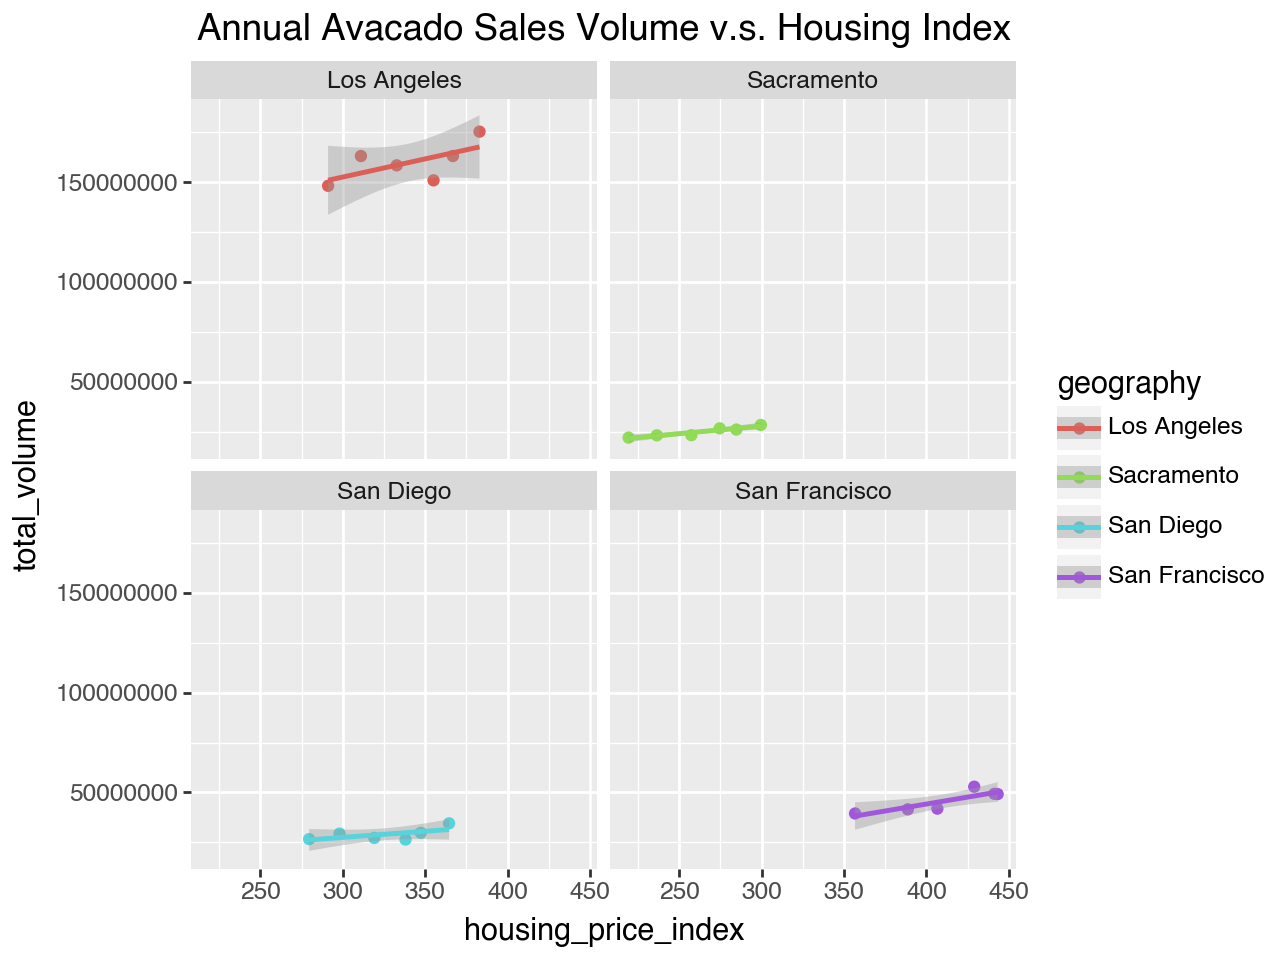

[<Figure Size: (640 x 480)>]

In [31]:
[p9.ggplot(df_question9) + p9.aes(x="housing_price_index",y="total_volume",color="geography") + 
 p9.geom_point() + 
 p9.facet_wrap("geography", ncol = 2) + 
 p9.stat_smooth(method="lm") + 
 p9.ggtitle("Annual Avacado Sales Volume v.s. Housing Index")
]

The plot suggests there is slighly positive correlation between. There is not enough evidence to support the claim that avacado consumption has a negative effect on housing. 